In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as report
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
data="process.csv"

In [2]:
df = pd.read_csv(data)
df = df.fillna(-2)
df.head()


,Shape,formula_pretty,formula_anonymous,volume,density,density_atomic,energy_per_atom,band_gap,efermi,is_gap_direct,is_metal,is_magnetic,ordering,total_magnetization,theoretical
0,0,AlPbO3,ABC3,56.379268,8.311042,11.275854,-6.651740,0.000,6.457979,0,1,0,0,0.032580,1
1,2,Ba2CoMoO6,ABC2D6,277.167172,6.296940,13.858359,-7.604548,1.274,3.062452,1,0,1,2,0.000002,1
2,0,Ba2CoMoO6,ABC2D6,276.766068,6.306065,13.838303,-7.613764,0.000,3.727364,0,1,1,2,0.010982,0
3,4,Ba3HoIrRuO9,ABCD3E9,448.998994,7.501607,14.966633,-7.461055,0.000,3.778487,0,1,1,1,4.000589,1
4,4,Ba3LiOs2O9,AB2C3D9,428.639080,7.309243,14.287969,-7.343171,0.000,3.513875,0,1,1,1,6.011189,0


In [3]:
features=['volume', 'density', 'density_atomic', 'energy_per_atom','band_gap', 'efermi','is_gap_direct', 'is_metal', 'is_magnetic', 'ordering','total_magnetization','theoretical']  
X = df.loc[0:len(df), features].values
Y = df.loc[0:len(df), "Shape"].values

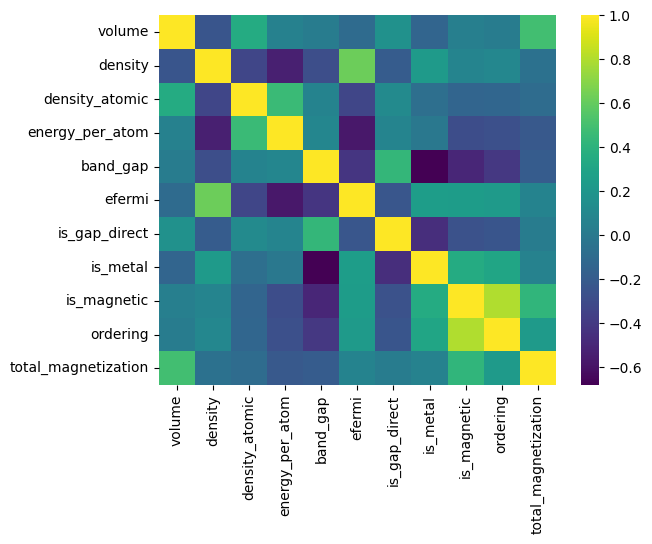

In [4]:
df_sub=df[features[:len(features)-1]]
corr_matrix = df_sub.corr()
corr_matrix = corr_matrix.round(2)

sns.heatmap(corr_matrix, annot=False, cmap='viridis')

plt.show()

In [5]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.15, random_state=42)
print(len(X_train),len(X_test))
oversample = SMOTE()#oversampling of data
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

12344 2179


In [6]:
def CRandCM(method,X_test,Y_test):#a function to print classification report and confusion matrix
    Y_pred=method.predict(X_test)
    cr = report(Y_test,  Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    print(cr)
    print(cm)

Random Forests


In [7]:
from sklearn.metrics import roc_auc_score
best_params_={'n_estimators': 250,'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_split': 2
 }

In [8]:
rfc = RandomForestClassifier(n_estimators=250,max_depth=100,min_samples_split=2,criterion='entropy')
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=250)

In [9]:
y_pred_proba = rfc.predict_proba(X_test)
roc_auc_scores = []
for i in range(Y_train.min(), Y_train.max()+1):
    y_true_i = (Y_test == i).astype(int)
    roc_auc_scores.append(roc_auc_score(y_true_i, y_pred_proba[:, i]))

mean_roc_auc = np.mean(roc_auc_scores)
print(roc_auc_scores)


[0.9987697201017812, 0.9966149958799188, 0.985884333373255, 0.996608527131783, 0.9991972202252576, 0.993225119744545, 0.9966122767962866]


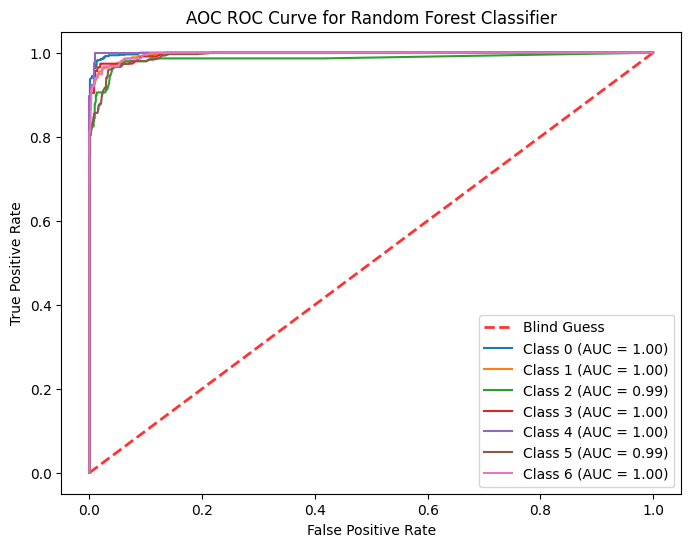

In [10]:
fprs = []
tprs = []
roc_auc_scores = []
for i in range(Y_train.min(), Y_train.max()+1):
    y_true_i = (Y_test == i).astype(int)
    fpr, tpr, _ = roc_curve(y_true_i, y_pred_proba[:, i])
    fprs.append(fpr)
    tprs.append(tpr)
    roc_auc_scores.append(roc_auc_score(y_true_i, y_pred_proba[:, i]))

mean_roc_auc = np.mean(roc_auc_scores)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Blind Guess', alpha=.8)

for i in range(Y_train.min(), Y_train.max()+1):
    plt.plot(fprs[i], tprs[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc_scores[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AOC ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [11]:
accuracy = rfc.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9407985314364388


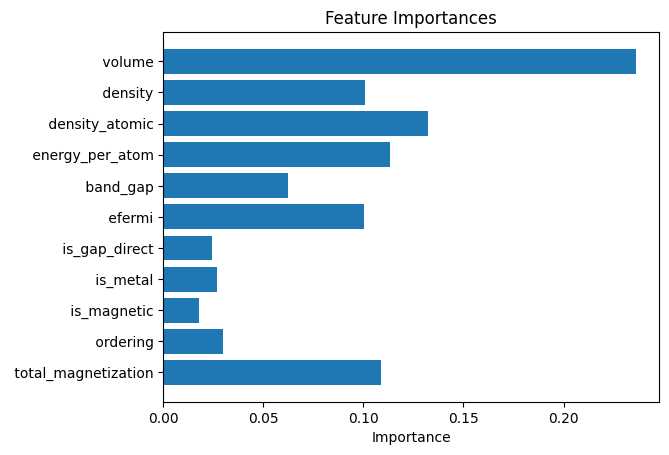

In [16]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]
ig, ax = plt.subplots()
y_pos = np.arange(len(importances))
ax.barh(y_pos[:len(y_pos)-1], importances[:len(importances)-1], align='center')
ax.set_yticks(y_pos[:len(y_pos)-1])
ax.set_yticklabels([" {}".format(features[i]) for i in range(0,len(importances)-1)])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')
plt.show()

Multilayer Perception

In [14]:
hidden_layer_sizes_range = [ ( 100 ,),( 110 ,),( 120 ,),( 130 ,),( 140 ,)]
alpha_range = [ 0.01,0.02,0.03]
learning_rate_range = ['constant', 'adaptive']
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes_range,
                  alpha=alpha_range,
                  learning_rate=learning_rate_range)
mlp = MLPClassifier()
grid = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=1)
grid.fit(X_train, Y_train)
print("Best parameters: ", grid.best_params_)
print("Best accuracy score: ", grid.best_score_)

c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [17]:
mlp = MLPClassifier(alpha=0.01,hidden_layer_sizes=(200,),learning_rate='constant')
mlp.fit(X_train,Y_train)
accuracy = mlp.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5277650298301974


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(100,):0.527765
(200,):

In [ ]:
weights = mlp.coefs_[0]

importances = np.mean(np.abs(weights), axis=1)
print("Feature importances:")
for i, importance in enumerate(importances):
    print("{}: {:.4f}".format(features[i], importance))

Feature importances:
volume: 0.0306
density: 0.0996
density_atomic: 0.0773
energy_per_atom: 0.1047
band_gap: 0.1397
efermi: 0.1433
is_gap_direct: 0.2785
is_metal: 0.2066
is_magnetic: 0.2395
ordering: 0.1743
total_magnetization: 0.0807
theoretical: 0.3329


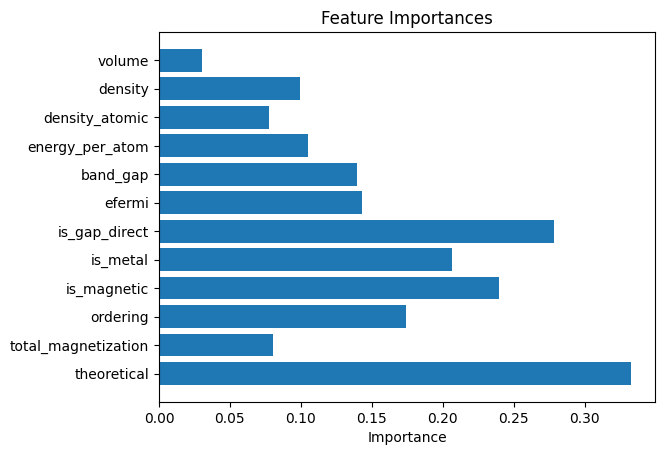

In [ ]:
fig, ax = plt.subplots()
y_pos = np.arange(len(importances))
ax.barh(y_pos, importances, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(["{}".format(features[i]) for i in range(len(importances))])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')

plt.show()

Recurrent Neural Networks (RNN)

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=1000, random_state=42)
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.48857654915350923


Quadratic Discriminant Analysis (QDA)

In [ ]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58
